In [5]:
import pandas as pd
import numpy as np

In [6]:
data = pd.read_csv("../Data/clean/CDC/CDCSTDoverall2000_2020_clean.csv")

In [7]:
data.head()

,Unnamed: 0.1,year,geography,fips,cases_chlamydia,cases_early_non-primary_non-secondary_syphilis,cases_gonorrhea,cases_primary_and_secondary_syphilis,rate_per_100000_chlamydia,rate_per_100000_early_non-primary_non-secondary_syphilis,...,rate_per_100000_male_gonorrhea_multiracial,rate_per_100000_male_gonorrhea_native_hawaiian_other_pacific_islander,rate_per_100000_male_gonorrhea_white,rate_per_100000_male_primary_and_secondary_syphilis_american_indian_alaska_native,rate_per_100000_male_primary_and_secondary_syphilis_asian,rate_per_100000_male_primary_and_secondary_syphilis_black_african_american,rate_per_100000_male_primary_and_secondary_syphilis_hispanic_latino,rate_per_100000_male_primary_and_secondary_syphilis_multiracial,rate_per_100000_male_primary_and_secondary_syphilis_native_hawaiian_other_pacific_islander,rate_per_100000_male_primary_and_secondary_syphilis_white
0,0,2000,"Abbeville County, SC",45001,61.0,1.0,57.0,2.0,232.6,3.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2000,"Acadia Parish, LA",22001,0.0,8.0,0.0,11.0,0.0,13.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,2000,"Accomack County, VA",51001,153.0,2.0,88.0,0.0,398.7,5.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,2000,"Ada County, ID",16001,644.0,0.0,33.0,1.0,212.3,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,2000,"Adair County, IA",19001,8.0,0.0,0.0,0.0,97.6,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
df_sum = data.groupby(['year'])['cases_gonorrhea','cases_chlamydia','cases_early_non-primary_non-secondary_syphilis','cases_primary_and_secondary_syphilis'].sum().reset_index()

/var/folders/zl/tww5174129gdj_kds5bh2xx80000gn/T/ipykernel_94920/3700150800.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_sum = data.groupby(['year'])['cases_gonorrhea','cases_chlamydia','cases_early_non-primary_non-secondary_syphilis','cases_primary_and_secondary_syphilis'].sum().reset_index()


In [10]:
df_sum.head()

,year,cases_gonorrhea,cases_chlamydia,cases_early_non-primary_non-secondary_syphilis,cases_primary_and_secondary_syphilis
0,2000,211146.0,382937.0,9989.0,6117.0
1,2001,245376.0,487710.0,9262.0,6287.0
2,2002,345771.0,813734.0,9064.0,7089.0
3,2003,332157.0,869687.0,8989.0,7352.0
4,2004,327207.0,921261.0,8101.0,8152.0


In [14]:
df = df_sum[['year','cases_chlamydia']]

In [27]:
df = df.drop(labels=20, axis=0)

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns 

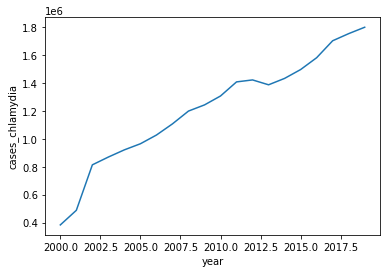

In [29]:
sns.lineplot(data = df,x="year",y="cases_chlamydia")
plt.show()

In [31]:
from scipy import signal

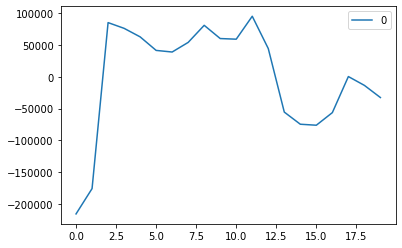

In [34]:
detrended = signal.detrend(df.cases_chlamydia)
detrended_df = pd.DataFrame(detrended)
detrended_df.plot()
plt.show()

In [35]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

/opt/homebrew/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


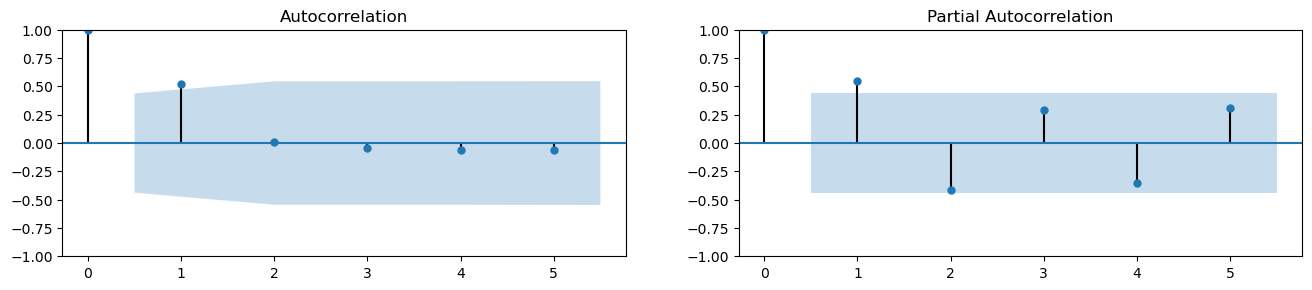

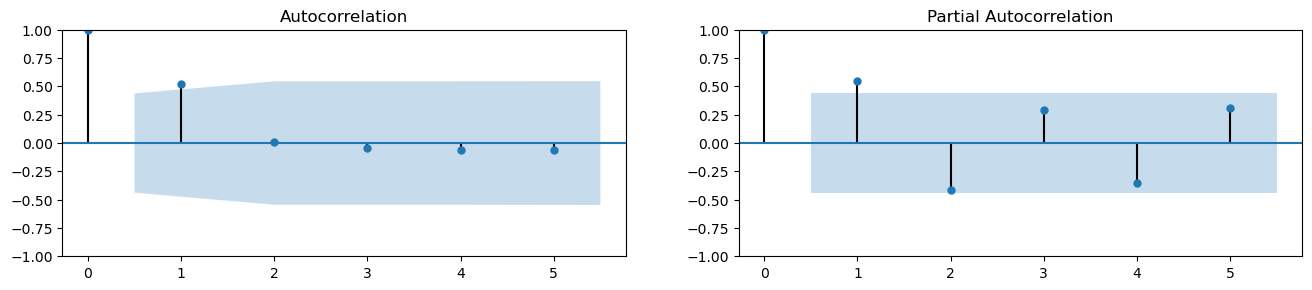

In [47]:
fig, axes = plt.subplots(1,2,figsize=(16,3), dpi= 100)
plot_acf(detrended_df[0].tolist(), lags=5, ax=axes[0])
plot_pacf(detrended_df[0].tolist(), lags=5, ax=axes[1])

In [49]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(detrended_df[0], order=(2,2,0))
model_fit = model.fit()
# summary of fit model
print(model_fit.summary())
# line plot of residuals
# residuals = DataFrame(model_fit.resid)
# residuals.plot()
# pyplot.show()
# # density plot of residuals
# residuals.plot(kind='kde')
# pyplot.show()
# # summary stats of residuals
# print(residuals.describe())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   20
Model:                 ARIMA(2, 2, 0)   Log Likelihood                -231.484
Date:                Tue, 12 Jul 2022   AIC                            468.968
Time:                        16:09:53   BIC                            471.640
Sample:                             0   HQIC                           469.337
                                 - 20                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1750      0.038     -4.626      0.000      -0.249      -0.101
ar.L2         -0.5415      0.030    -18.183      0.000      -0.600      -0.483
sigma2      1.684e+09   4.18e-12   4.03e+20      0.0

In [54]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(detrended_df[0], order=(0,2,0))
model_fit = model.fit()
# summary of fit model
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   20
Model:                 ARIMA(0, 2, 0)   Log Likelihood                -231.211
Date:                Tue, 12 Jul 2022   AIC                            464.422
Time:                        16:16:30   BIC                            465.312
Sample:                             0   HQIC                           464.545
                                 - 20                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      7.522e+09   1.39e+09      5.405      0.000    4.79e+09    1.03e+10
Ljung-Box (L1) (Q):                   3.65   Jarque-Bera (JB):                 8.56
Prob(Q):                              0.06   Pr